# Task 1: Basic Probabilities and Visualizations (1)

### Listing A.1: Task-1: Falling Meteorites, PMF visualization

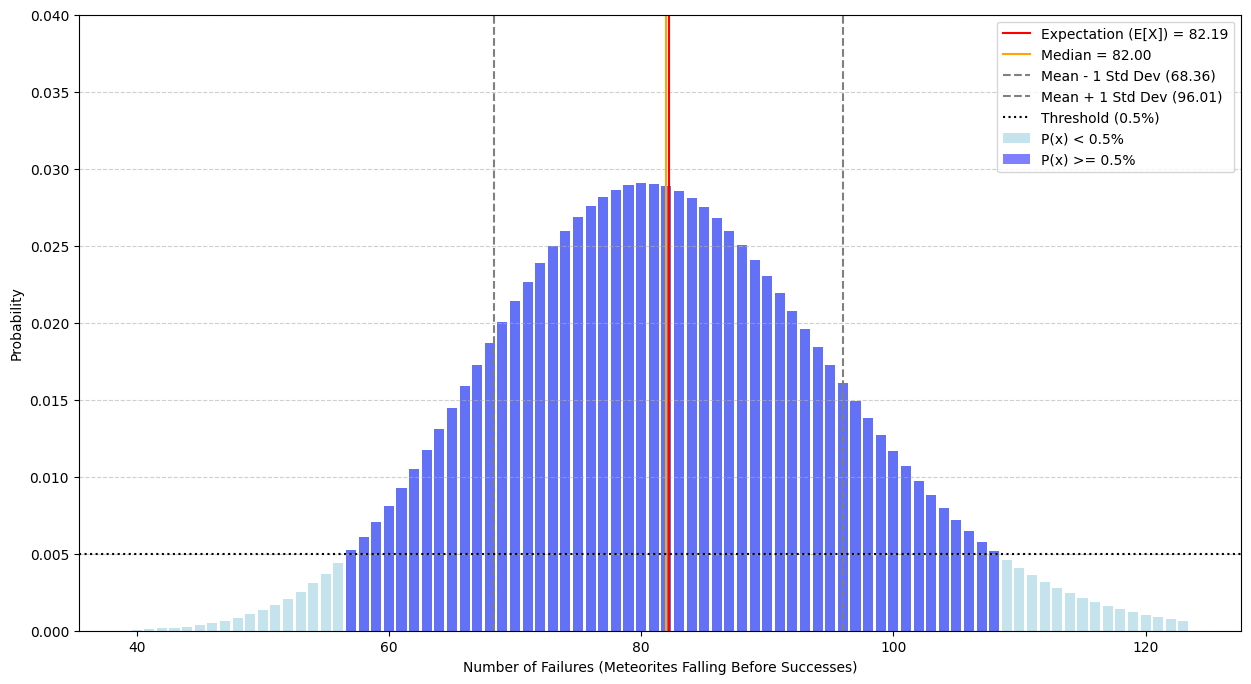

Expectation (E[X]): 82.19
Median: 82.00
Standard Deviation: 13.82
Range of outcomes where P(x) >= 0.5%: x ∈ [57, 108]
x range: [40, 123]
Summarized probabilities where P(x) >= 0.5%: 0.9415


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters
k, p = 62, 0.43  # Number of successes and probability of success

# Calculate statistics
mean, std_dev, median = nbinom.mean(k, p), np.sqrt(nbinom.var(k, p)), nbinom.median(k, p)

# Dynamic x range: mean +/- 3 standard deviations
x_min, x_max = max(0, int(mean - 3 * std_dev)), int(mean + 3 * std_dev)
x = np.arange(x_min, x_max + 1)
probabilities = nbinom.pmf(x, k, p)

# Determine range for P(x) >= 0.5%
threshold = 0.005
start, end = x[np.argmax(probabilities >= threshold)], x[np.max(np.where(probabilities >= threshold))]

# Summarize probabilities where P(x) >= 0.5%
summarized_probabilities_above_threshold = probabilities[(x >= start) & (x <= end)].sum()

# Visualization
plt.figure(figsize=(15, 8))  # Increased width by 25%
plt.bar(x, probabilities, color="lightblue", alpha=0.7, label="P(x) < 0.5%")
plt.bar(x[(x >= start) & (x <= end)], probabilities[(x >= start) & (x <= end)], color="blue", alpha=0.5, label="P(x) >= 0.5%")

# Add markers for expectation, median, and standard deviations
plt.axvline(mean, color="red", linestyle="-", label=f"Expectation (E[X]) = {mean:.2f}")
plt.axvline(median, color="orange", linestyle="-", label=f"Median = {median:.2f}")
plt.axvline(mean - std_dev, color="gray", linestyle="--", label=f"Mean - 1 Std Dev ({mean - std_dev:.2f})")
plt.axvline(mean + std_dev, color="gray", linestyle="--", label=f"Mean + 1 Std Dev ({mean + std_dev:.2f})")

# Horizontal threshold line
plt.axhline(threshold, color="black", linestyle=":", label="Threshold (0.5%)")
plt.xlabel("Number of Failures (Meteorites Falling Before Successes)")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.ylim(0, 0.04)
plt.show()

# Output results
print(f"Expectation (E[X]): {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Range of outcomes where P(x) >= 0.5%: x ∈ [{start}, {end}]")
print(f"x range: [{x_min}, {x_max}]")
print(f"Summarized probabilities where P(x) >= 0.5%: {summarized_probabilities_above_threshold:.4f}")
